### 1.浏览器访问题目  
- 打开[猿人学题表](https://match.yuanrenxue.com/list)  
- 打开开发者工具(F12)
    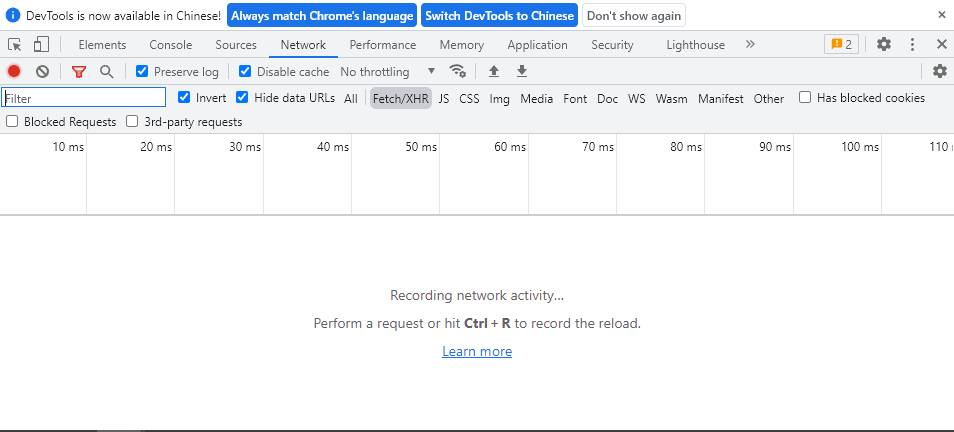
- 点击第一题
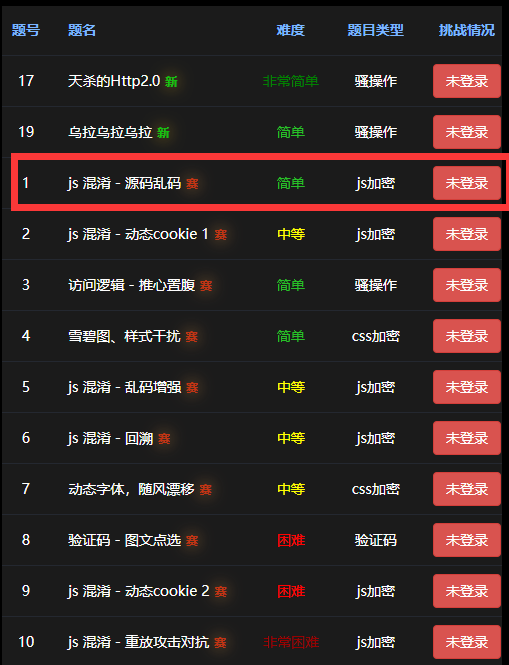

### 2.尝试分析解决步骤
- 浏览题目
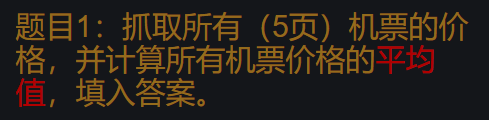
- 梳理思路
    1. Python请求链接（需要传入参数）
    2. 拿到五页的价格并计算平均值
    3. 提交答案

### 3.尝试解决步骤1请求链接
- 解决断点问题
> 如果访问第一题会被js中的断点拦截下来，此时按Ctrl+F8让所有断点经过，然后F5刷新页面
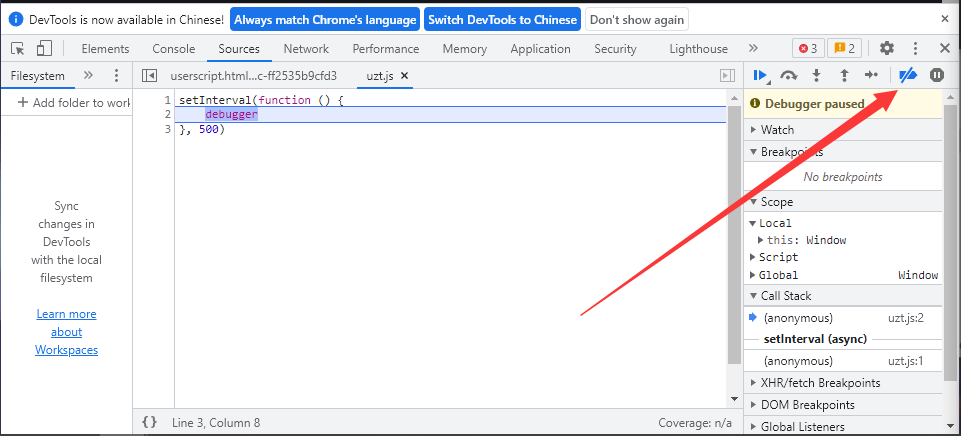
- 找到发送请求
> 在network请求拦截中看到GET方式请求了URL，参数是m，并且返回的有价格列表
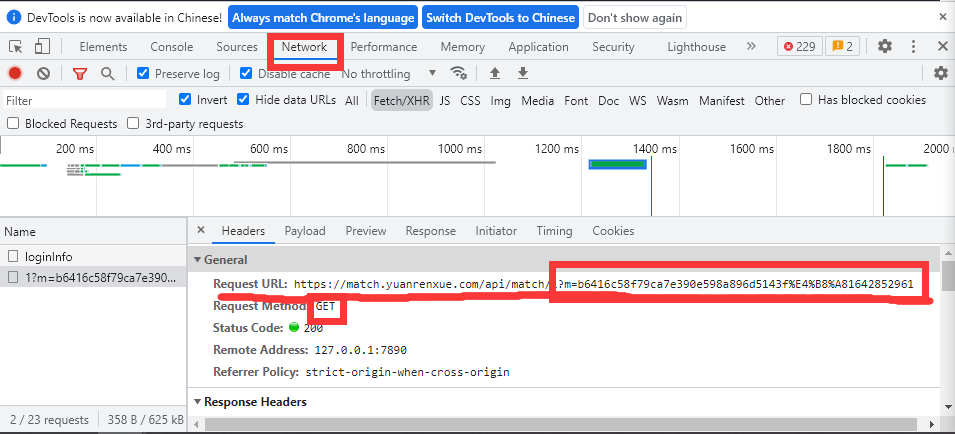
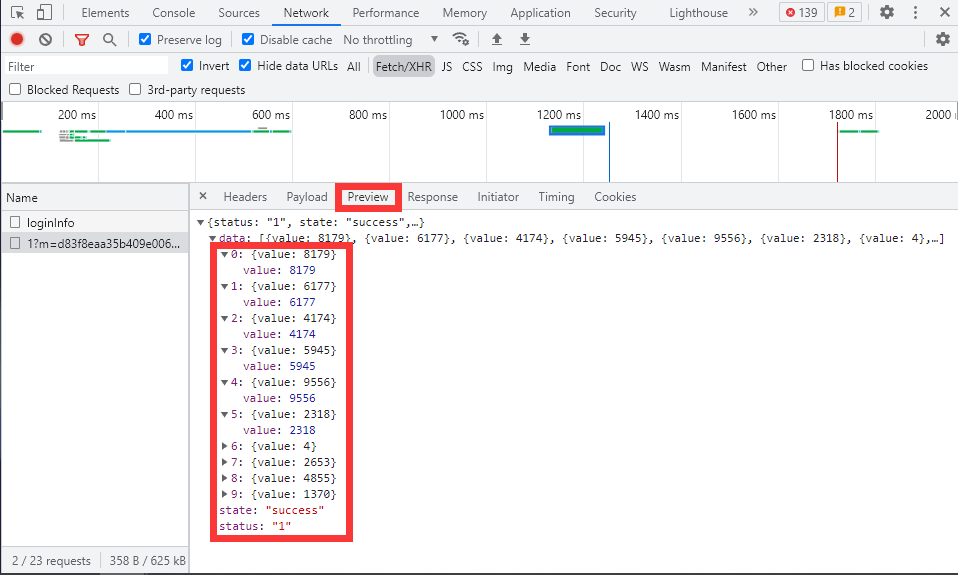
> 切换到payload查看传入的参数格式

> 可以看到m的参数是经过加密的

### 3.1寻找加密过程
- 寻找入口
> 点击initiator，可以看到调用了五个堆栈，我们点击第一个进入文件

> 可以看到源文件，点击格式化代码

> 再点击左边的序号，在此处下一个断点，然后刷新页面
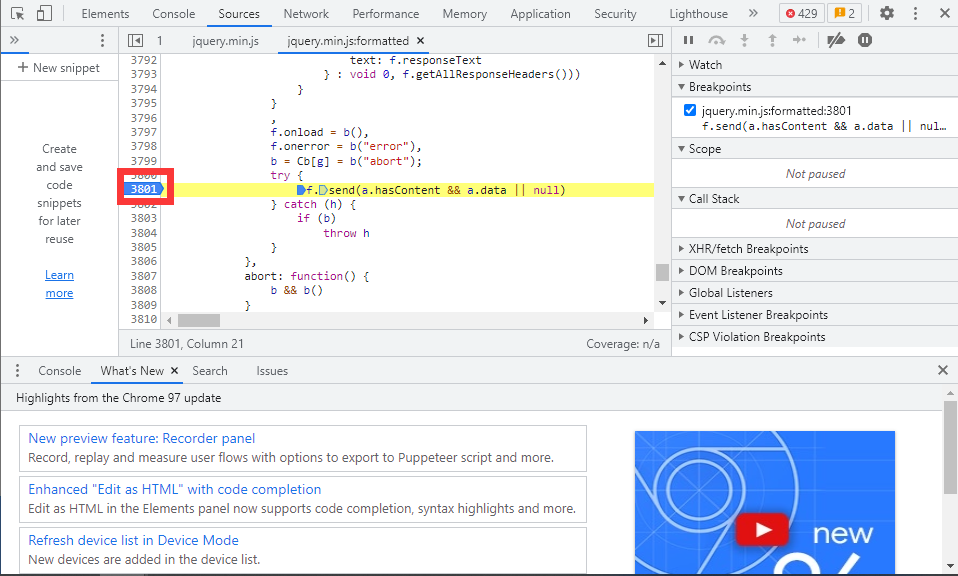
- 寻找加密位置
> 程序会被断下，由于第一次抓的包不是我们想要的（只调用了三个堆栈不是之前看到的五个），按下F8继续拦截下一个
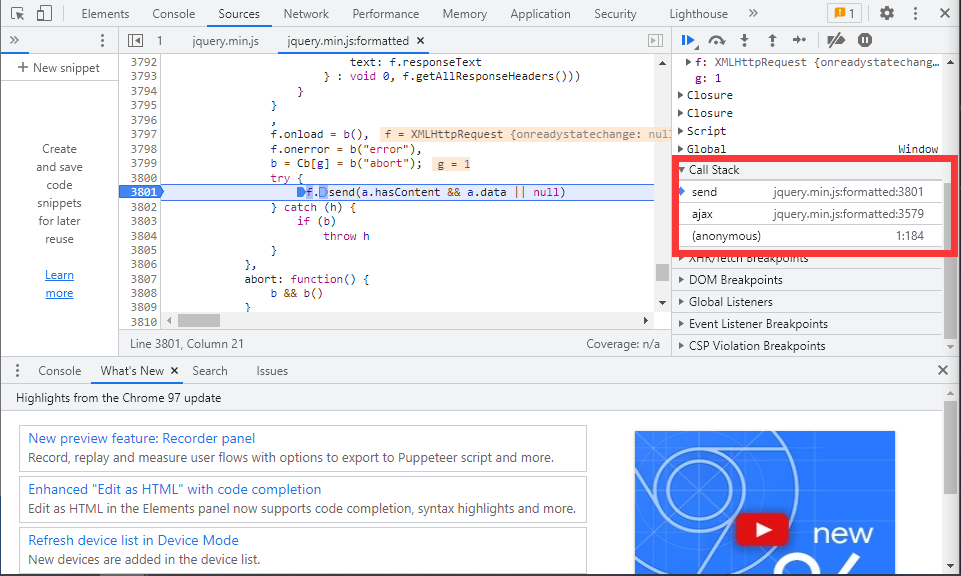
> 由此可看到拦截的包有五个堆栈，对应之前看到的，但是变量列表里没有我们想要的变量，我们查看上一个堆栈
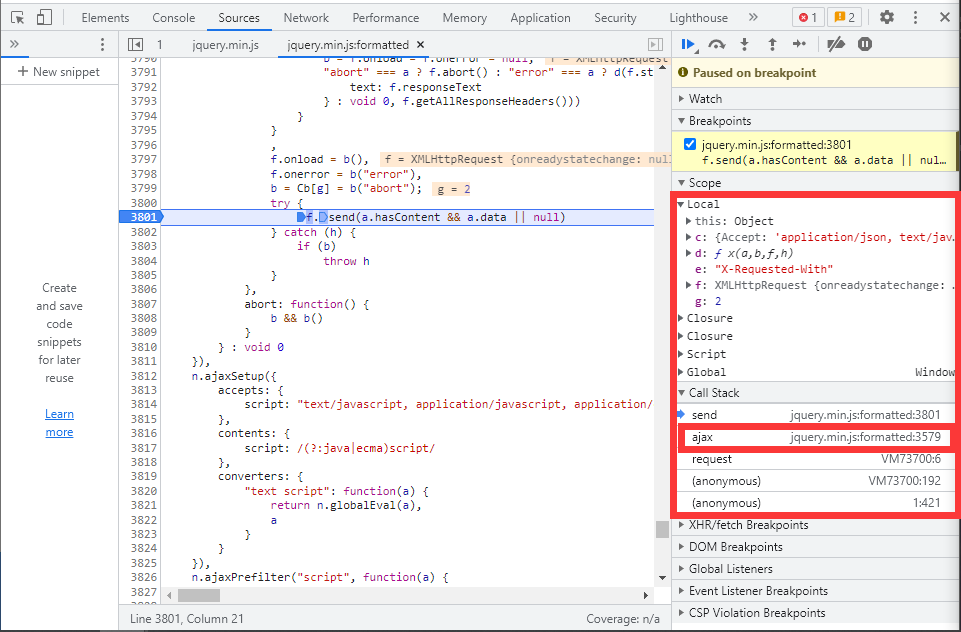
> 找到了我们想要的m变量的值，我们确定拦截了正确的包 

> 继续往上查看堆栈，找到(anonymous）时，发现要找的变量不见了，由此判断加密过程一定是在下一个堆栈中，即request,我们点击定位下


### 3.2解析加密过程
- 格式化代码
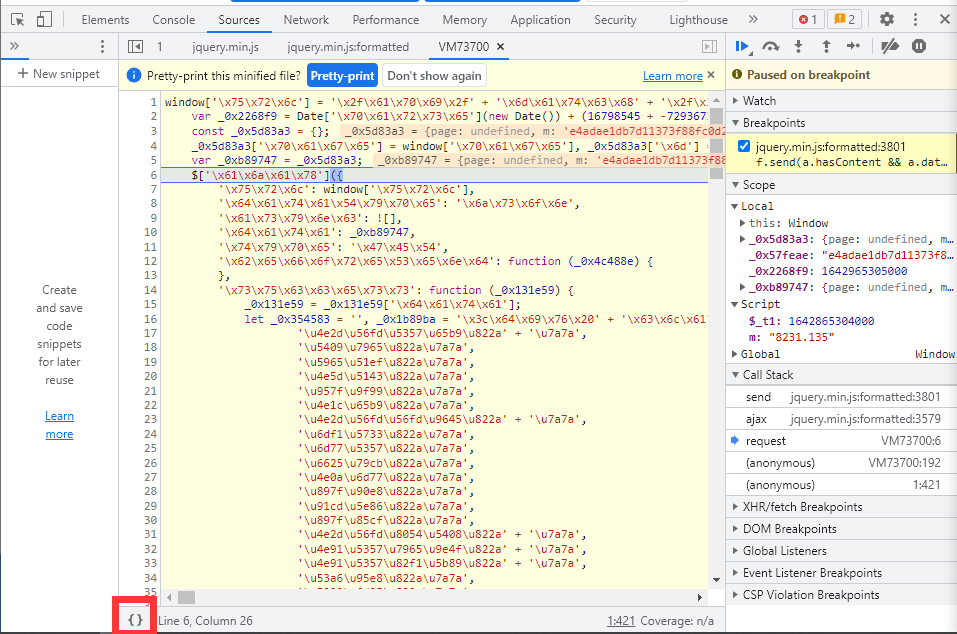
- 分析代码
> 发现主要在代码前几行实现赋值，单拧出来分析
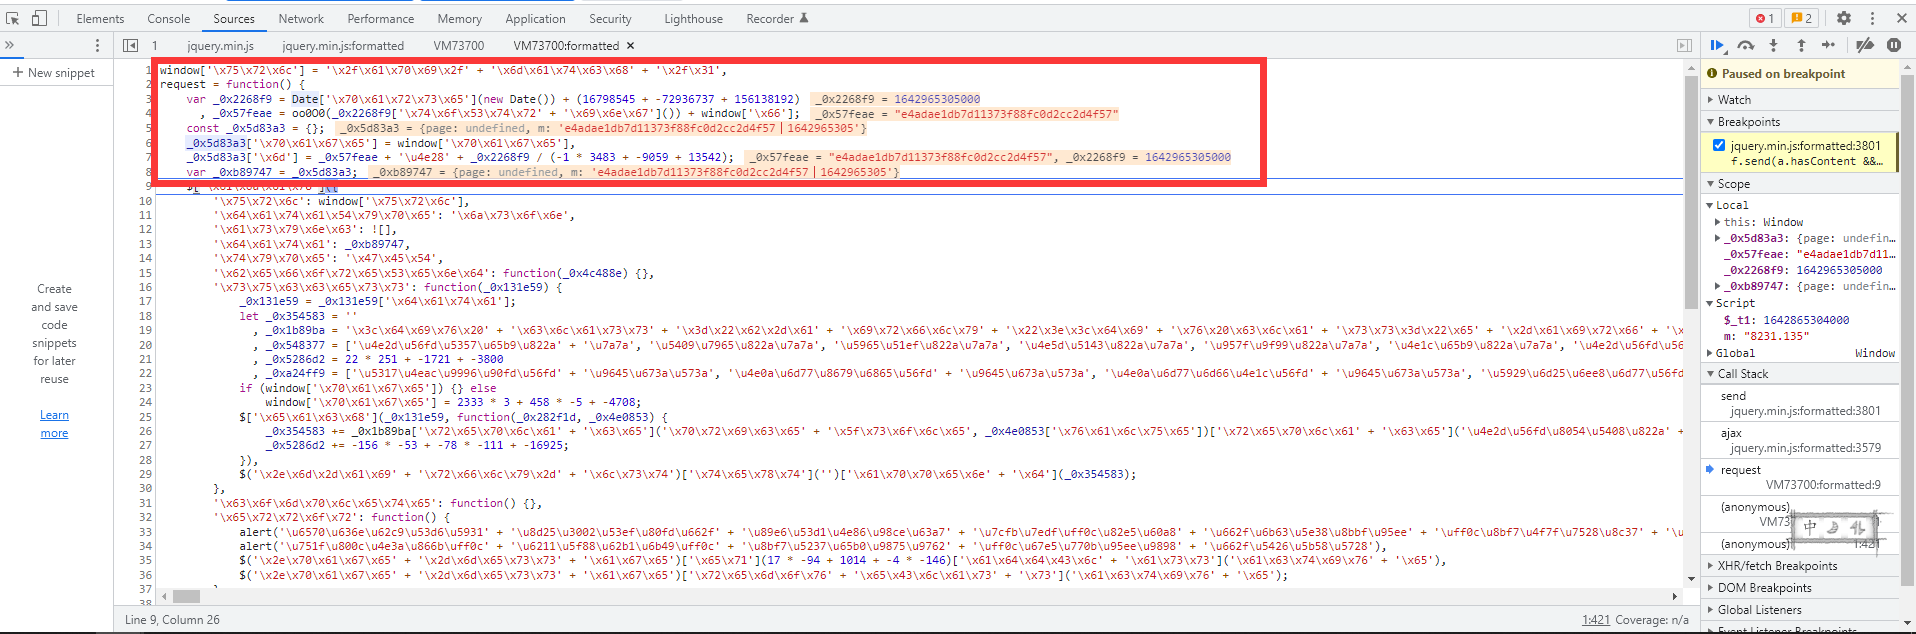


```javascript
window['\x75\x72\x6c'] = '\x2f\x61\x70\x69\x2f' + '\x6d\x61\x74\x63\x68' + '\x2f\x31',
request = function() {
    var _0x2268f9 = Date['\x70\x61\x72\x73\x65'](new Date()) + (16798545 + -72936737 + 156138192)
      , _0x57feae = oo0O0(_0x2268f9['\x74\x6f\x53\x74\x72' + '\x69\x6e\x67']()) + window['\x66'];
    const _0x5d83a3 = {};
    _0x5d83a3['\x70\x61\x67\x65'] = window['\x70\x61\x67\x65'],
    _0x5d83a3['\x6d'] = _0x57feae + '\u4e28' + _0x2268f9 / (-1 * 3483 + -9059 + 13542);
    var _0xb89747 = _0x5d83a3;
```

> 发现_0x2268f9变量值是参数m后半部分的乘以1000的值，等于获取时间戳+100000000
> 发现_0x57feae调用函数oo0O0，传递了_0x2268f9的时间戳和全局变量window['\x66']，（这里使用了16禁止命名法，'\x66'=f），且window[f]正是参数m前半部分的值
> 分析m值为：windos[f] + 中文竖线丨 + 时间戳/1000

- 跟踪代码
> 跟进oo0o0函数，鼠标指向后在弹框中点击
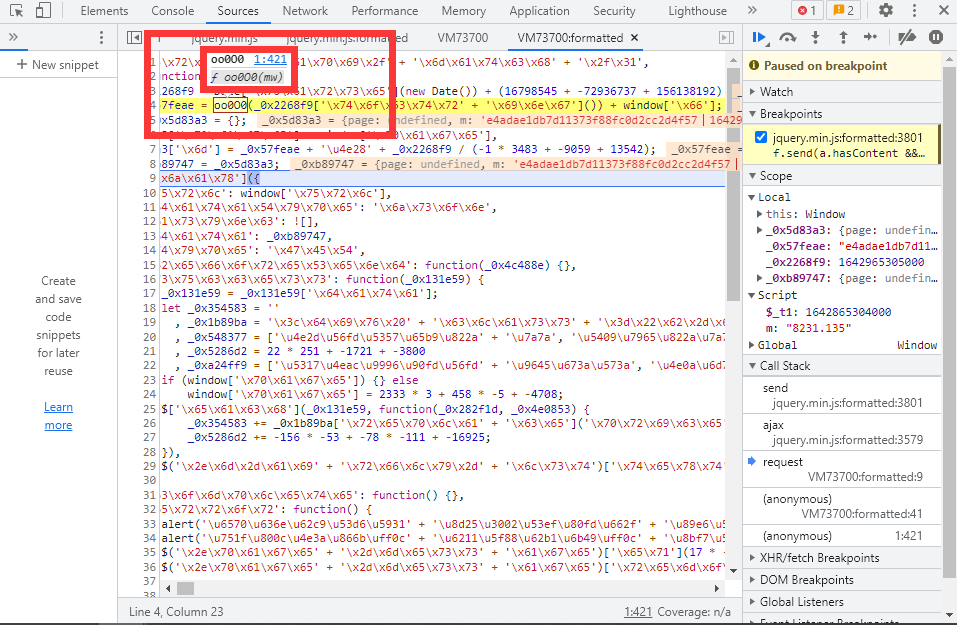
> 跟进之后无法格式化，复制最后一行的代码进入[js在线格式化工具](https://tool.chinaz.com/tools/jsformat.aspx)，粘贴后点击格式化
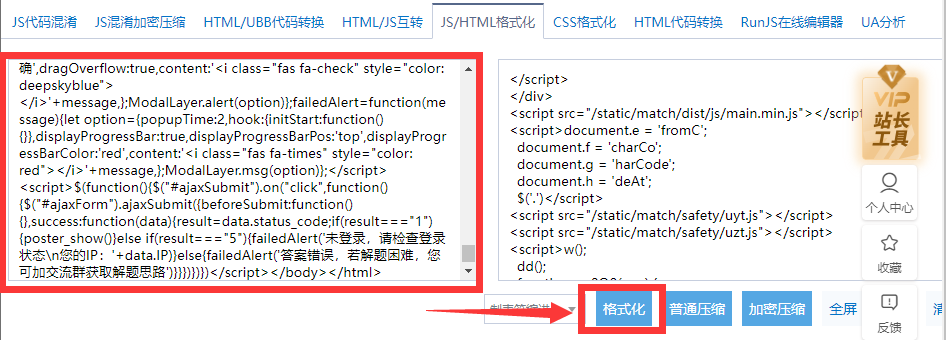
> 找到oo0o0函数定义位置，删除前面和后面无用的代码


```javascript
function oo0O0(mw) {
  window.b = '';
  for (var i = 0,
  len = window.a.length; i < len; i++) {
    console.log(window.a[i]);
    window.b += String[document.e + document.g](window.a[i][document.f + document.h]() - i - window.c)
  }
  var U = ['W5r5W6VdIHZcT8kU', 'WQ8CWRaxWQirAW=='];
  var J = function(o, E) {
    o = o - 0x0;
    var N = U[o];
    if (J['bSSGte'] === undefined) {
      var Y = function(w) {
        var m = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789+/=',
        T = String(w)['replace'](/=+$/, '');
        var A = '';
        for (var C = 0x0,
        b, W, l = 0x0; W = T['charAt'](l++);~W && (b = C % 0x4 ? b * 0x40 + W: W, C++%0x4) ? A += String['fromCharCode'](0xff & b >> ( - 0x2 * C & 0x6)) : 0x0) {
          W = m['indexOf'](W)
        }
        return A
      };
      var t = function(w, m) {
        var T = [],
        A = 0x0,
        C,
        b = '',
        W = '';
        w = Y(w);
        for (var R = 0x0,
        v = w['length']; R < v; R++) {
          W += '%' + ('00' + w['charCodeAt'](R)['toString'](0x10))['slice']( - 0x2)
        }
        w = decodeURIComponent(W);
        var l;
        for (l = 0x0; l < 0x100; l++) {
          T[l] = l
        }
        for (l = 0x0; l < 0x100; l++) {
          A = (A + T[l] + m['charCodeAt'](l % m['length'])) % 0x100,
          C = T[l],
          T[l] = T[A],
          T[A] = C
        }
        l = 0x0,
        A = 0x0;
        for (var L = 0x0; L < w['length']; L++) {
          l = (l + 0x1) % 0x100,
          A = (A + T[l]) % 0x100,
          C = T[l],
          T[l] = T[A],
          T[A] = C,
          b += String['fromCharCode'](w['charCodeAt'](L) ^ T[(T[l] + T[A]) % 0x100])
        }
        return b
      };
      J['luAabU'] = t,
      J['qlVPZg'] = {},
      J['bSSGte'] = !![]
    }
    var H = J['qlVPZg'][o];
    return H === undefined ? (J['TUDBIJ'] === undefined && (J['TUDBIJ'] = !![]), N = J['luAabU'](N, E), J['qlVPZg'][o] = N) : N = H,
    N
  };
  eval(atob(window['b'])[J('0x0', ']dQW')](J('0x1', 'GTu!'), '\x27' + mw + '\x27'));
  return ''
}
```

### 3.3解析跟踪的代码
- 分析代码
> 发现最后返回空，和预想的一致
> 倒数第二行有调用解密函数atob，需要逆向window['b']，和它的参数
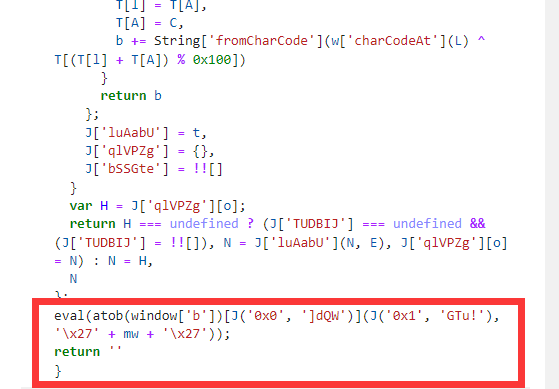
> 手动在Console执行atob(window['b'])得到一段js代码
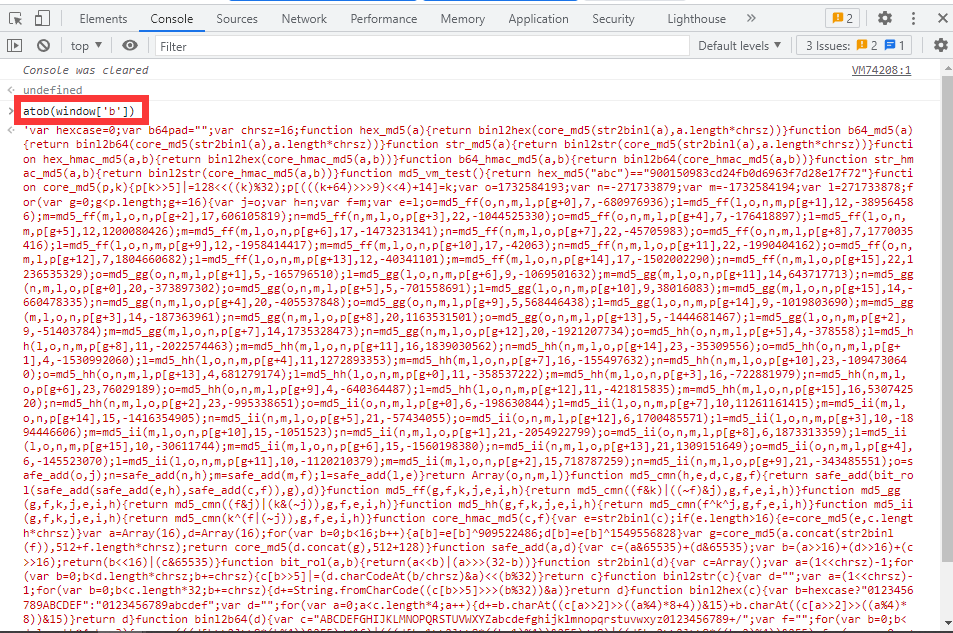
> 复制解析到的js代码并在[js在线格式化工具](https://tool.chinaz.com/tools/jsformat.aspx)中删除前后单引号并格式化
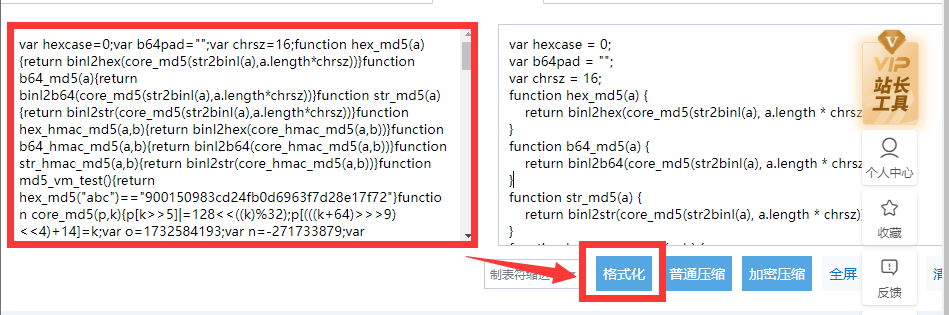
> 此时发现代码为md5加密方式，且在代码最后赋予了全局变量f的值，f的值为m参数的前半部分,赋值调用hex_md5方式加密，传递的参数是[J('0x0', ']dQW')](J('0x1', 'GTu!'), '\x27' + mw + '\x27')
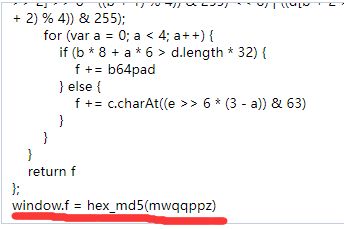
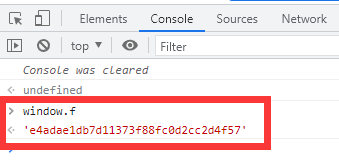
- 逆向代码
> 为了查看传递的参数值，添加JS代码

> 粘贴上面的js代码，Ctrl+S保存并在atob处下断点，之后刷新网页，右键这个文件点击run

>在下面的console中测试参数,首先调用oo0o0函数随便传入字符串，然后测试参数

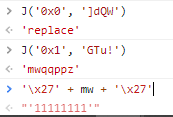
- 分析代码
> atob解密windo['b']，传递'replace'、'mwqqppz'和时间戳,结果赋值给f  
> f的值组成m参数的前半部分，时间戳计算后生成后半部分  
> 将之前解析的js代码改写，添加合成的代码  

### 3.4构建js代码
```javascript
//console调用atob(window['b'])解析后的代码
var hexcase = 0;
var b64pad = "";
var chrsz = 16;
function hex_md5(a) {
    return binl2hex(core_md5(str2binl(a), a.length * chrsz))
}
function b64_md5(a) {
    return binl2b64(core_md5(str2binl(a), a.length * chrsz))
}
function str_md5(a) {
    return binl2str(core_md5(str2binl(a), a.length * chrsz))
}
function hex_hmac_md5(a, b) {
    return binl2hex(core_hmac_md5(a, b))
}
function b64_hmac_md5(a, b) {
    return binl2b64(core_hmac_md5(a, b))
}
function str_hmac_md5(a, b) {
    return binl2str(core_hmac_md5(a, b))
}
function md5_vm_test() {
    return hex_md5("abc") == "900150983cd24fb0d6963f7d28e17f72"
}
function core_md5(p, k) {
    p[k >> 5] |= 128 << ((k) % 32);
    p[(((k + 64) >>> 9) << 4) + 14] = k;
    var o = 1732584193;
    var n = -271733879;
    var m = -1732584194;
    var l = 271733878;
    for (var g = 0; g < p.length; g += 16) {
        var j = o;
        var h = n;
        var f = m;
        var e = l;
        o = md5_ff(o, n, m, l, p[g + 0], 7, -680976936);
        l = md5_ff(l, o, n, m, p[g + 1], 12, -389564586);
        m = md5_ff(m, l, o, n, p[g + 2], 17, 606105819);
        n = md5_ff(n, m, l, o, p[g + 3], 22, -1044525330);
        o = md5_ff(o, n, m, l, p[g + 4], 7, -176418897);
        l = md5_ff(l, o, n, m, p[g + 5], 12, 1200080426);
        m = md5_ff(m, l, o, n, p[g + 6], 17, -1473231341);
        n = md5_ff(n, m, l, o, p[g + 7], 22, -45705983);
        o = md5_ff(o, n, m, l, p[g + 8], 7, 1770035416);
        l = md5_ff(l, o, n, m, p[g + 9], 12, -1958414417);
        m = md5_ff(m, l, o, n, p[g + 10], 17, -42063);
        n = md5_ff(n, m, l, o, p[g + 11], 22, -1990404162);
        o = md5_ff(o, n, m, l, p[g + 12], 7, 1804660682);
        l = md5_ff(l, o, n, m, p[g + 13], 12, -40341101);
        m = md5_ff(m, l, o, n, p[g + 14], 17, -1502002290);
        n = md5_ff(n, m, l, o, p[g + 15], 22, 1236535329);
        o = md5_gg(o, n, m, l, p[g + 1], 5, -165796510);
        l = md5_gg(l, o, n, m, p[g + 6], 9, -1069501632);
        m = md5_gg(m, l, o, n, p[g + 11], 14, 643717713);
        n = md5_gg(n, m, l, o, p[g + 0], 20, -373897302);
        o = md5_gg(o, n, m, l, p[g + 5], 5, -701558691);
        l = md5_gg(l, o, n, m, p[g + 10], 9, 38016083);
        m = md5_gg(m, l, o, n, p[g + 15], 14, -660478335);
        n = md5_gg(n, m, l, o, p[g + 4], 20, -405537848);
        o = md5_gg(o, n, m, l, p[g + 9], 5, 568446438);
        l = md5_gg(l, o, n, m, p[g + 14], 9, -1019803690);
        m = md5_gg(m, l, o, n, p[g + 3], 14, -187363961);
        n = md5_gg(n, m, l, o, p[g + 8], 20, 1163531501);
        o = md5_gg(o, n, m, l, p[g + 13], 5, -1444681467);
        l = md5_gg(l, o, n, m, p[g + 2], 9, -51403784);
        m = md5_gg(m, l, o, n, p[g + 7], 14, 1735328473);
        n = md5_gg(n, m, l, o, p[g + 12], 20, -1921207734);
        o = md5_hh(o, n, m, l, p[g + 5], 4, -378558);
        l = md5_hh(l, o, n, m, p[g + 8], 11, -2022574463);
        m = md5_hh(m, l, o, n, p[g + 11], 16, 1839030562);
        n = md5_hh(n, m, l, o, p[g + 14], 23, -35309556);
        o = md5_hh(o, n, m, l, p[g + 1], 4, -1530992060);
        l = md5_hh(l, o, n, m, p[g + 4], 11, 1272893353);
        m = md5_hh(m, l, o, n, p[g + 7], 16, -155497632);
        n = md5_hh(n, m, l, o, p[g + 10], 23, -1094730640);
        o = md5_hh(o, n, m, l, p[g + 13], 4, 681279174);
        l = md5_hh(l, o, n, m, p[g + 0], 11, -358537222);
        m = md5_hh(m, l, o, n, p[g + 3], 16, -722881979);
        n = md5_hh(n, m, l, o, p[g + 6], 23, 76029189);
        o = md5_hh(o, n, m, l, p[g + 9], 4, -640364487);
        l = md5_hh(l, o, n, m, p[g + 12], 11, -421815835);
        m = md5_hh(m, l, o, n, p[g + 15], 16, 530742520);
        n = md5_hh(n, m, l, o, p[g + 2], 23, -995338651);
        o = md5_ii(o, n, m, l, p[g + 0], 6, -198630844);
        l = md5_ii(l, o, n, m, p[g + 7], 10, 11261161415);
        m = md5_ii(m, l, o, n, p[g + 14], 15, -1416354905);
        n = md5_ii(n, m, l, o, p[g + 5], 21, -57434055);
        o = md5_ii(o, n, m, l, p[g + 12], 6, 1700485571);
        l = md5_ii(l, o, n, m, p[g + 3], 10, -1894446606);
        m = md5_ii(m, l, o, n, p[g + 10], 15, -1051523);
        n = md5_ii(n, m, l, o, p[g + 1], 21, -2054922799);
        o = md5_ii(o, n, m, l, p[g + 8], 6, 1873313359);
        l = md5_ii(l, o, n, m, p[g + 15], 10, -30611744);
        m = md5_ii(m, l, o, n, p[g + 6], 15, -1560198380);
        n = md5_ii(n, m, l, o, p[g + 13], 21, 1309151649);
        o = md5_ii(o, n, m, l, p[g + 4], 6, -145523070);
        l = md5_ii(l, o, n, m, p[g + 11], 10, -1120210379);
        m = md5_ii(m, l, o, n, p[g + 2], 15, 718787259);
        n = md5_ii(n, m, l, o, p[g + 9], 21, -343485551);
        o = safe_add(o, j);
        n = safe_add(n, h);
        m = safe_add(m, f);
        l = safe_add(l, e)
    }
    return Array(o, n, m, l)
}
function md5_cmn(h, e, d, c, g, f) {
    return safe_add(bit_rol(safe_add(safe_add(e, h), safe_add(c, f)), g), d)
}
function md5_ff(g, f, k, j, e, i, h) {
    return md5_cmn((f & k) | ((~f) & j), g, f, e, i, h)
}
function md5_gg(g, f, k, j, e, i, h) {
    return md5_cmn((f & j) | (k & (~j)), g, f, e, i, h)
}
function md5_hh(g, f, k, j, e, i, h) {
    return md5_cmn(f ^ k ^ j, g, f, e, i, h)
}
function md5_ii(g, f, k, j, e, i, h) {
    return md5_cmn(k ^ (f | (~j)), g, f, e, i, h)
}
function core_hmac_md5(c, f) {
    var e = str2binl(c);
    if (e.length > 16) {
        e = core_md5(e, c.length * chrsz)
    }
    var a = Array(16),
    d = Array(16);
    for (var b = 0; b < 16; b++) {
        a[b] = e[b] ^ 909522486;
        d[b] = e[b] ^ 1549556828
    }
    var g = core_md5(a.concat(str2binl(f)), 512 + f.length * chrsz);
    return core_md5(d.concat(g), 512 + 128)
}
function safe_add(a, d) {
    var c = (a & 65535) + (d & 65535);
    var b = (a >> 16) + (d >> 16) + (c >> 16);
    return (b << 16) | (c & 65535)
}
function bit_rol(a, b) {
    return (a << b) | (a >>> (32 - b))
}
function str2binl(d) {
    var c = Array();
    var a = (1 << chrsz) - 1;
    for (var b = 0; b < d.length * chrsz; b += chrsz) {
        c[b >> 5] |= (d.charCodeAt(b / chrsz) & a) << (b % 32)
    }
    return c
}
function binl2str(c) {
    var d = "";
    var a = (1 << chrsz) - 1;
    for (var b = 0; b < c.length * 32; b += chrsz) {
        d += String.fromCharCode((c[b >> 5] >>> (b % 32)) & a)
    }
    return d
}
function binl2hex(c) {
    var b = hexcase ? "0123456789ABCDEF": "0123456789abcdef";
    var d = "";
    for (var a = 0; a < c.length * 4; a++) {
        d += b.charAt((c[a >> 2] >> ((a % 4) * 8 + 4)) & 15) + b.charAt((c[a >> 2] >> ((a % 4) * 8)) & 15)
    }
    return d
}
function binl2b64(d) {
    var c = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/";
    var f = "";
    for (var b = 0; b < d.length * 4; b += 3) {
        var e = (((d[b >> 2] >> 8 * (b % 4)) & 255) << 16) | (((d[b + 1 >> 2] >> 8 * ((b + 1) % 4)) & 255) << 8) | ((d[b + 2 >> 2] >> 8 * ((b + 2) % 4)) & 255);
        for (var a = 0; a < 4; a++) {
            if (b * 8 + a * 6 > d.length * 32) {
                f += b64pad
            } else {
                f += c.charAt((e >> 6 * (3 - a)) & 63)
            }
        }
    }
    return f
};
//window.f = hex_md5(mwqqppz)
//改写为下面代码

//新添部分
function get_m(){
    var time = Date.parse(new Date()) + 100000000; //模仿函数，加上+ 100000000
    var f = hex_md5(time.toString()); //模仿定义函数f
    var res = f + '丨' + time/1000; //模仿组合，然后返回参数m
    return res;
}
```
*保存到解密.js*

In [18]:
#3.5 运行解密.js文件测试
import execjs

# 解密程序
def calculate_m():
    # 读入js文件
    with open('解密.js',mode='r',encoding='utf-8') as f: 
        jsData = f.read()
    # 调用新添js代码中的函数名
    m_value = execjs.compile(jsData).call('get_m') 
    # 返回计算的m值
    return m_value

m = calculate_m()
print(m)

e9f0e19858a4ecd9df3c0fd284b6812e丨1643022709


In [32]:
#3.6 访问第一页测试
import requests

# 定义一个函数，用于之后循环调用获取网页
def get_html(url,headers,params):
    # 访问网页
    rsp = requests.get(url,headers=headers,params=params)
    # 返回获取的网页
    return rsp

# 添加浏览器中拦截包里面的参数
url = "https://match.yuanrenxue.com/api/match/1"
headers = {
    'Proxy-Connection': 'keep-alive',
    'Pragma': 'no-cache',
    'Cache-Control': 'no-cache',
    'Upgrade-Insecure-Requests': '1',
    'DNT': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Accept-Language': 'zh-CN,zh;q=0.9,ja;q=0.8,en;q=0.7',
    'authority': 'match.yuanrenxue.com',
    'pragma': 'no-cache',
    'cache-control': 'no-cache',
    'upgrade-insecure-requests': '1',
    'dnt': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'empty',
    'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'accept-language': 'zh-CN,zh;q=0.9,ja;q=0.8,en;q=0.7',
    'referer': 'https://match.yuanrenxue.com/match/1',
    'Referer': 'https://match.yuanrenxue.com/',
    'x-requested-with': 'XMLHttpRequest',
}
m = calculate_m() #刷新m值
params = {
    "page":"1", # 访问第1页
    "m":m # 导入之前计算的m的值
} 

# 获取第一页
rsp = get_html(url,headers,params)
rsp

<Response [200]>

In [24]:
#4.访问五个网页，并取出值
for i in range(1,6):
    m = calculate_m() #刷新m值
    params["page"] = str(i) #依次获取页数
    params["m"] = m #赋予新m值
    rsp = get_html(url,headers,params)
    print(rsp.text)

{"status": "1", "state": "success", "data": [{"value": 8179}, {"value": 6177}, {"value": 4174}, {"value": 5945}, {"value": 9556}, {"value": 2318}, {"value": 4}, {"value": 2653}, {"value": 4855}, {"value": 1370}]}
{"status": "1", "state": "success", "data": [{"value": 2366}, {"value": 2108}, {"value": 6159}, {"value": 5685}, {"value": 2010}, {"value": 7109}, {"value": 1002}, {"value": 9300}, {"value": 8995}, {"value": 5732}]}
{"status": "1", "state": "success", "data": [{"value": 5535}, {"value": 7126}, {"value": 7472}, {"value": 4129}, {"value": 2724}, {"value": 3475}, {"value": 3605}, {"value": 7729}, {"value": 1860}, {"value": 833}]}
第四页，第五页已锁定。只能使用程序进行协议请求才能看到数据。在使用程序请求这两个页面时请将User-Agent设置为： yuanrenxue.project
第四页，第五页已锁定。只能使用程序进行协议请求才能看到数据。在使用程序请求这两个页面时请将User-Agent设置为： yuanrenxue.project


In [39]:
#4.1 由于最后两页锁定，需要根据提示改变值
headers2 = {
    'Proxy-Connection': 'keep-alive',
    'Pragma': 'no-cache',
    'Cache-Control': 'no-cache',
    'Upgrade-Insecure-Requests': '1',
    'DNT': '1',
    'User-Agent': 'yuanrenxue.project',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Accept-Language': 'zh-CN,zh;q=0.9,ja;q=0.8,en;q=0.7',
    'authority': 'match.yuanrenxue.com',
    'pragma': 'no-cache',
    'cache-control': 'no-cache',
    'upgrade-insecure-requests': '1',
    'dnt': '1',
    'user-agent': 'yuanrenxue.project',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'empty',
    'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'accept-language': 'zh-CN,zh;q=0.9,ja;q=0.8,en;q=0.7',
    'referer': 'https://match.yuanrenxue.com/match/1',
    'Referer': 'https://match.yuanrenxue.com/',
    'x-requested-with': 'XMLHttpRequest',
}

def get_html2(url,headers,params):
    rsp = get_html(url,headers,params)
    return rsp

# 循环访问5个页面
for i in range(1,6):
    m = calculate_m() #刷新m值
    params["page"] = str(i) #依次获取页数
    params["m"] = m #赋予新m值
    if i >3:
        rsp = get_html2(url,headers2,params) # 传入改写的headers
    else:
        rsp = get_html2(url,headers,params)
    print(rsp.text)

{"status": "1", "state": "success", "data": [{"value": 8179}, {"value": 6177}, {"value": 4174}, {"value": 5945}, {"value": 9556}, {"value": 2318}, {"value": 4}, {"value": 2653}, {"value": 4855}, {"value": 1370}]}
{"status": "1", "state": "success", "data": [{"value": 2366}, {"value": 2108}, {"value": 6159}, {"value": 5685}, {"value": 2010}, {"value": 7109}, {"value": 1002}, {"value": 9300}, {"value": 8995}, {"value": 5732}]}
{"status": "1", "state": "success", "data": [{"value": 5535}, {"value": 7126}, {"value": 7472}, {"value": 4129}, {"value": 2724}, {"value": 3475}, {"value": 3605}, {"value": 7729}, {"value": 1860}, {"value": 833}]}
{"status": "1", "state": "success", "data": [{"value": 3937}, {"value": 6420}, {"value": 115}, {"value": 4333}, {"value": 6674}, {"value": 383}, {"value": 5922}, {"value": 7344}, {"value": 7012}, {"value": 8009}]}
{"status": "1", "state": "success", "data": [{"value": 9297}, {"value": 8727}, {"value": 4130}, {"value": 1910}, {"value": 5976}, {"value": 29

In [90]:
#4.2 获取将计算的值,并计算均值

value_list = []
# 循环访问5个页面
for i in range(1,6):
    m = calculate_m() #刷新m值
    params["page"] = str(i) #依次获取页数
    params["m"] = m #赋予新m值
    if i >3:
        rsp = get_html2(url,headers2,params) # 传入改写的headers
    else:
        rsp = get_html2(url,headers,params)
    data = rsp.json()
    
    value = [i['value'] for i in data['data']] # 取出值
    #计算每页均值并添加到列表
    value_list.append(sum(value)/len(value))
# 计算所有均值
answer = sum(value_list)/len(value_list)
print(answer)

4700.0


In [91]:
#5.提交答案
url = "https://match.yuanrenxue.com/api/answer"
params = {"answer":f"{answer}","id":"1"}
rsp = rq.get(url,headers=headers,params=params)
rsp.text

'{"info": "no login", "IP": "125.69.115.12", "status_code": "5"}'